In [1]:
import numpy as np

In [2]:
def sigmoid(x: float) -> float:
    return 1/(1 + np.exp(-x))

def perceptron_output(w: list, bias: float, x: list) -> float:
    calculation = np.dot(w, x) + bias
    return sigmoid(calculation)

weights = [2., 2]
bias = -3

perceptron_output(weights, bias, [1, 1])

0.7310585786300049

In [3]:
class Perceptron:
    def __init__(self, input_length, output_length):
        self.w = np.random.rand(input_length, output_length)
        self.bias = np.random.rand(output_length)
    
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def feed_forward(self, x: list) -> float:
        calculation = np.dot(x, self.w) + self.bias
        return self.sigmoid(calculation)

p0 = Perceptron(input_length=2, output_length=1)
p0.feed_forward([1, 0])

array([0.64571394])

In [4]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, classification_report
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [5]:
class Network:
    def __init__(self, n_inputs, n_hidden, n_outputs):
        self.hidden_layer = Perceptron(n_inputs, n_hidden)
        self.output_layer = Perceptron(n_hidden, n_outputs)
        self.losses = []

    def feed_forward(self, X):
        self.hidden_output = self.hidden_layer.feed_forward(X)
        return self.output_layer.feed_forward(self.hidden_output)

    def back_propagation(self, inputs, output, target, learning_rate):
        error = target - output
        delta = error * self.output_layer.sigmoid_derivative(output)
        delta = delta.reshape(1, -1)

        hidden_error = np.dot(delta, self.output_layer.w.T)
        hidden_delta = hidden_error * self.hidden_layer.sigmoid_derivative(self.hidden_output)

        self.output_layer.w += learning_rate * np.dot(self.hidden_output.T, delta)
        self.output_layer.bias += learning_rate * delta.flatten()

        self.hidden_layer.w += learning_rate * np.dot(inputs.T, hidden_delta)
        self.hidden_layer.bias += learning_rate * hidden_delta.flatten()


    def train(self, X_train, y_train, epochs, learning_rate):
        for _ in range(epochs):
            epoch_losses = 0
            for inputs, target in zip(X_train, y_train):
                inputs = inputs.reshape(1, -1)
                target = target.reshape(1, -1)
                output = self.feed_forward(inputs)
                self.back_propagation(inputs, output, target, learning_rate)
                loss = np.mean((target - output) ** 2)
                epoch_losses += loss
            self.losses.append(epoch_losses / len(X_train))

    def fit(self, X_train, y_train, epochs, learning_rate):
        self.train(X_train, y_train, epochs, learning_rate)

    def predict(self, X_test):
        predictions = []
        for inputs in X_test:
            inputs = inputs.reshape(1, -1)
            output = self.feed_forward(inputs)
            predictions.append(output)
        return predictions

In [6]:
data = load_breast_cancer()
X = data.data
y = data.target

selected_features_indices = [data.feature_names.tolist().index(feature) for feature in 
                             ['mean area', 'area error', 'worst perimeter', 'worst area']]
X_selected = X[:, selected_features_indices]


X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

epochs = 100
network = Network(X_train.shape[1], 10, 1)
network.fit(X_train, y_train, epochs=100, learning_rate=0.1)
predictions = network.predict(X_test)
y_pred = [1 if pred >= 0.5 else 0 for pred in predictions]

print(classification_report(y_test, y_pred))
print(f"\nMSE: {mean_squared_error(y_test, y_pred)}")

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        43
           1       0.99      0.99      0.99        71

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114


MSE: 0.017543859649122806


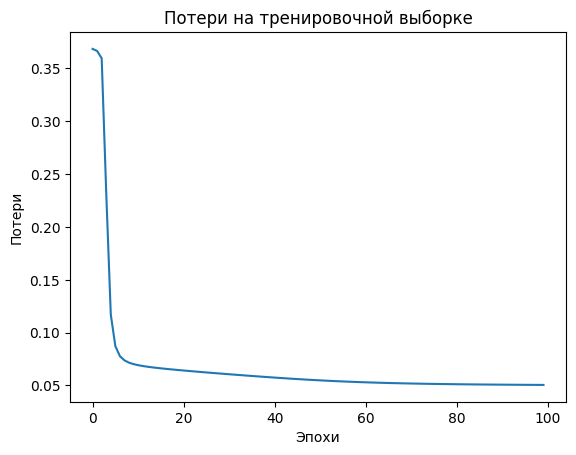

In [8]:
plt.plot(network.losses)
plt.xlabel('Эпохи')
plt.ylabel('Потери')
plt.title('Потери на тренировочной выборке')
plt.show()

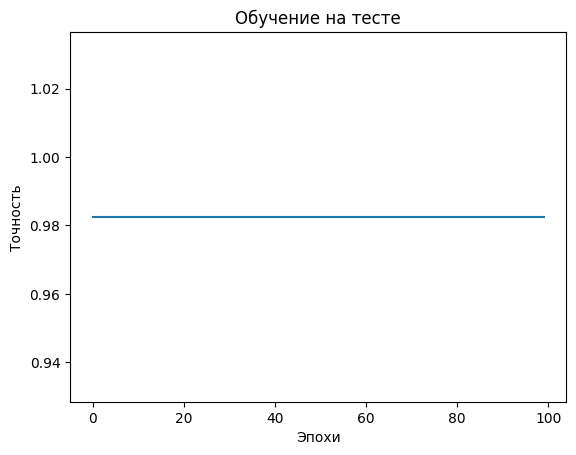

In [9]:
accuracy = []

def compute_accuracy(predictions, true_labels):
    return accuracy_score(true_labels, predictions)

for _ in range(epochs):
    predictions = network.predict(X_test)
    acc = compute_accuracy(y_pred, y_test)
    accuracy.append(acc)

plt.plot(accuracy)
plt.xlabel('Эпохи')
plt.ylabel('Точность')
plt.title('Обучение на тесте')
plt.show()

# MNIST

In [64]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [72]:
digits_mnist = keras.datasets.mnist
(train_x, train_y), (test_x, test_y) = tf.keras.datasets.mnist.load_data()

train_x = train_x.reshape(-1, 28, 28, 1).astype(np.float32) / 255.
test_x = test_x.reshape(-1, 28, 28, 1).astype(np.float32) / 255.

In [73]:
class_labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

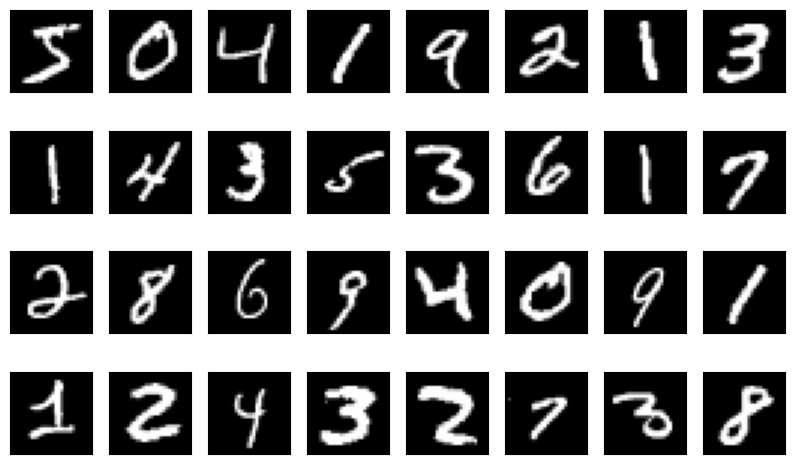

In [74]:
def plot_some_samples(some_samples):
    fig = plt.figure(figsize=(10, 6))
    for j in range(some_samples.shape[0]):
        ax = fig.add_subplot(4, 8, j+1)
        ax.imshow(some_samples[j,:,:,0], cmap='gray')
        plt.xticks([]), plt.yticks([])
    plt.show()
    
plot_some_samples(train_x[:32, ...])

In [75]:
NUM_CLASSES = 10
NUM_EPOCHS = 3
BATCH_SIZE = 64

In [89]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (5, 5), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2), (2, 2), padding='same'),
    # tf.keras.layers.Conv2D(64, (5, 5), activation='relu', padding='same'),
    # tf.keras.layers.MaxPooling2D((2, 2), (2, 2), padding='same'),
    # tf.keras.layers.Flatten(),
    # tf.keras.layers.Dense(256, activation='relu'),
    # tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [90]:
loss = tf.keras.losses.SparseCategoricalCrossentropy()
model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])

In [91]:
history = model.fit(train_x, train_y, epochs=NUM_EPOCHS, batch_size=BATCH_SIZE, validation_data=(test_x, test_y))

Epoch 1/3


938/938 [==============================] - 20s 19ms/step - loss: 0.1534 - accuracy: 0.9546 - val_loss: 0.0531 - val_accuracy: 0.9819
Epoch 2/3
938/938 [==============================] - 18s 19ms/step - loss: 0.0508 - accuracy: 0.9841 - val_loss: 0.0414 - val_accuracy: 0.9862
Epoch 3/3
938/938 [==============================] - 18s 19ms/step - loss: 0.0326 - accuracy: 0.9900 - val_loss: 0.0395 - val_accuracy: 0.9864


In [92]:
model.evaluate(test_x, test_y)

313/313 [==============================] - 1s 4ms/step - loss: 0.0395 - accuracy: 0.9864


[0.039534881711006165, 0.9864000082015991]

# С полносвязными слоями только

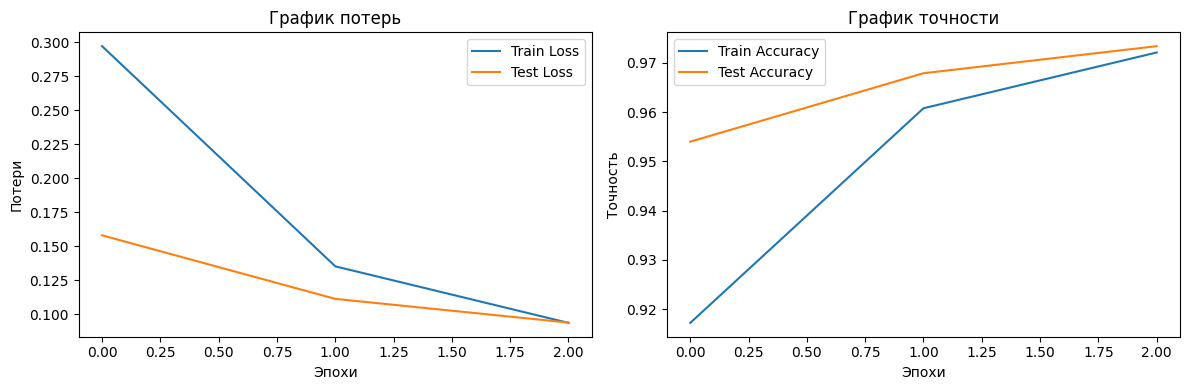

In [87]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('График потерь')
plt.xlabel('Эпохи')
plt.ylabel('Потери')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('График точности')
plt.xlabel('Эпохи')
plt.ylabel('Точность')
plt.legend()

plt.tight_layout()
plt.show()

# Со сверточным слоем

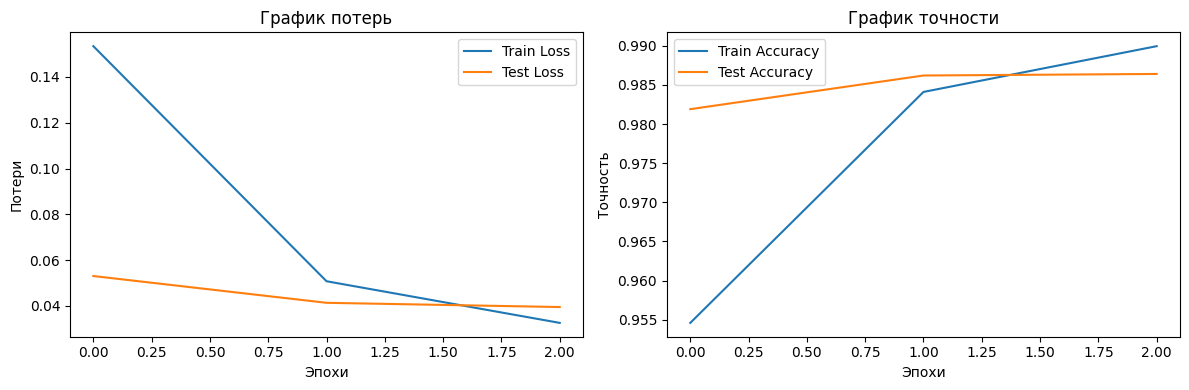

In [93]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('График потерь')
plt.xlabel('Эпохи')
plt.ylabel('Потери')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('График точности')
plt.xlabel('Эпохи')
plt.ylabel('Точность')
plt.legend()

plt.tight_layout()
plt.show()